In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("startup data.csv")

In [3]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [5]:
df["is_software"].value_counts()

0    770
1    153
Name: is_software, dtype: int64

In [6]:
df.dtypes

Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate               

In [7]:
df.drop(["object_id","category_code","state_code.1","Unnamed: 0","state_code","zip_code","id","city",
        "Unnamed: 6","name","founded_at","closed_at","first_funding_at","last_funding_at"],axis=1,inplace=True)

In [9]:
df.dtypes

latitude                    float64
longitude                   float64
labels                        int64
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory              int64
has_VC                        int64
has_angel                   

In [10]:
df["status"].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [12]:
df['status'].replace({'acquired':1,'closed':0},inplace=True)

In [13]:
df.isnull().sum()

latitude                      0
longitude                     0
labels                        0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roun

In [23]:
df["is_consulting"].value_counts()

0    920
1      3
Name: is_consulting, dtype: int64

In [14]:
df["age_first_milestone_year"].fillna(df["age_first_milestone_year"].mean(),inplace=True)
df["age_last_milestone_year"].fillna(df["age_last_milestone_year"].mean(),inplace=True)

In [15]:
df.head()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,1,0,1,0,0,0,0,1.0000,0,1
1,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,0,1,0,0,1,1,1,4.7500,1,1
2,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,...,0,0,0,1,0,0,0,4.0000,1,1
3,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,...,0,0,0,0,1,1,1,3.3333,1,1
4,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,...,0,1,1,0,0,0,0,1.0000,1,0


In [24]:
col=["latitude","longitude","age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year",
    "relationships","funding_rounds","funding_total_usd","milestones","avg_participants"]

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

df[col]=scalar.fit_transform(df[col])

In [25]:
df.head()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,0.494494,0.367152,1,0.365061,0.389409,0.484841,0.432611,0.047619,0.222222,0.000064,...,1,0,1,0,0,0,0,0.000000,0,1
1,0.342036,0.005562,1,0.458030,0.615461,0.544988,0.442121,0.142857,0.333333,0.007033,...,0,1,0,0,1,1,1,0.250000,1,1
2,0.212867,0.039515,1,0.325749,0.325749,0.402200,0.290656,0.079365,0.000000,0.000454,...,0,0,0,1,0,0,0,0.200000,1,1
3,0.344460,0.005020,1,0.393572,0.464142,0.519179,0.410478,0.079365,0.222222,0.007016,...,0,0,0,0,1,1,1,0.155553,1,1
4,0.358127,0.002398,0,0.292368,0.346291,0.365677,0.222272,0.031746,0.111111,0.000226,...,0,1,1,0,0,0,0,0.000000,1,0


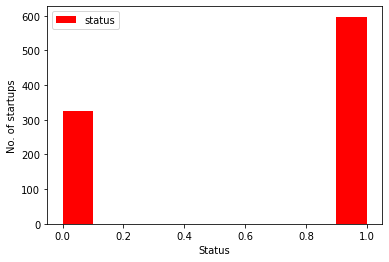

In [30]:
x=df["status"]
plt.hist(x,color="r",label="status")
plt.legend()
plt.xlabel("Status")
plt.ylabel("No. of startups")
plt.show()

In [31]:
x=df.drop("status",axis=1)
y=df["status"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [33]:
x_train.shape

(738, 34)

In [34]:
x_test.shape

(185, 34)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [39]:
model=keras.Sequential([
    keras.layers.Dense(30,input_shape=(34,),activation="relu"),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
24/24 [==============================] - 3s 5ms/step - loss: 0.7021 - accuracy: 0.5718
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.5518 - accuracy: 0.7683
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.8970
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 0.9797
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.9973
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 9/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 10/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000


In [40]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 1.0000


[0.002185731427744031, 1.0]

In [42]:
yp=model.predict(x_test)

6/6 [==============================] - 0s 6ms/step


In [43]:
yp[:6]

array([[0.9979377 ],
       [0.99851143],
       [0.99127114],
       [0.9984905 ],
       [0.02045559],
       [0.9996341 ]], dtype=float32)

In [44]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [48]:
comapre=pd.DataFrame({
    "Actual":y_test,
    "Predicted":y_pred
})

In [49]:
comapre.head()

,Actual,Predicted
797,1,1
848,1,1
178,1,1
859,1,1
438,0,0


In [50]:
y_pred[:5]

[1, 1, 1, 1, 0]

In [51]:
y_test[:5]

797    1
848    1
178    1
859    1
438    0
Name: status, dtype: int64

In [52]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       117

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

